In [ ]:
!pip install pydicom
!pip install pillow
#!pip install -q kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 9.0 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pydicom 
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageOps, ImageFilter

from scipy import ndimage
import scipy.misc 
import pandas as pd
from skimage import morphology, io, img_as_float

output_path="./"

## Imagen de carga y ventana

In [ ]:
medic_imagen = pydicom.read_file("ID_0007c5cb8.dcm")
print(medic_imagen)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 186
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.4267.32.15834743048106932624498377791427920415
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_0007c5cb8
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_fb787d7b'
(0020, 000d) Study Instance UID                  UI: ID_f4bcc345f0
(0020, 000e) Series Instance UID                 UI: ID_ec00002a48
(0020, 0010) Study ID                            SH: ''

/usr/local/lib/python3.7/dist-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: 'ID_0007c5cb8'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: 'ID_f4bcc345f0'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/pydicom/valuerep.py:290: UserWarning: Invalid value for VR UI: 'ID_ec00002a48'. Please see <https://dicom.nema.org/medical/dicom/current/output/html/part05.html#table_6.2-1> for allowed values for each VR.
  warnings.warn(msg)


In [ ]:
'Escala Hounsfield'
def transform_hu(medic_imagen, imagen):
    intercepto = medic_imagen.RescaleIntercept
    pendiente = medic_imagen.RescaleSlope
    hu_imagen = imagen * pendiente + intercepto

    return hu_imagen

In [ ]:
def imagen_ventana(imagen, centro_ventana, ancho_ventana):
    img_min = centro_ventana - ancho_ventana // 2
    img_max = centro_ventana + ancho_ventana // 2
    imagen_ventana = imagen.copy()
    imagen_ventana[imagen_ventana < img_min] = img_min
    imagen_ventana[imagen_ventana > img_max] = img_max
    
    return imagen_ventana

In [ ]:
def cargar_graficar_img(file_path, save=False):
    medic_imagen = pydicom.read_file(file_path)
    imagen = medic_imagen.pixel_array
    
    print(imagen.shape)
    
    hu_imagen = transform_hu(medic_imagen, imagen)
    cerebro_imagen = imagen_ventana(hu_imagen, 40, 80)
    hueso_imagen = imagen_ventana(hu_imagen, 400, 1000)
    
    plt.figure(figsize=(20, 10))
    plt.style.use('grayscale')

    plt.subplot(151)
    plt.imshow(imagen)
    plt.title('Original')
    plt.axis('off')

    plt.subplot(152)
    plt.imshow(hu_imagen)
    plt.title('Imagen en Escala de HU')
    plt.axis('off')

    plt.subplot(153)
    plt.imshow(cerebro_imagen)
    plt.title('Imagen del Cerebro')
    plt.axis('off')

    plt.subplot(154)
    plt.imshow(hueso_imagen)
    plt.title('Imagen del Hueso')
    plt.axis('off')

    if save:
        mpimg.imsave(os.path.join(output_path, f'{file_path[:-4]}-original.png'), imagen)
        mpimg.imsave(os.path.join(output_path, f'{file_path[:-4]}-hu_imagen.png'), hu_imagen)
        mpimg.imsave(os.path.join(output_path, f'{file_path[:-4]}-cerebro_imagen.png'), cerebro_imagen)
        mpimg.imsave(os.path.join(output_path, f'{file_path[:-4]}-hueso_imagen.png'), hueso_imagen)

(512, 512)


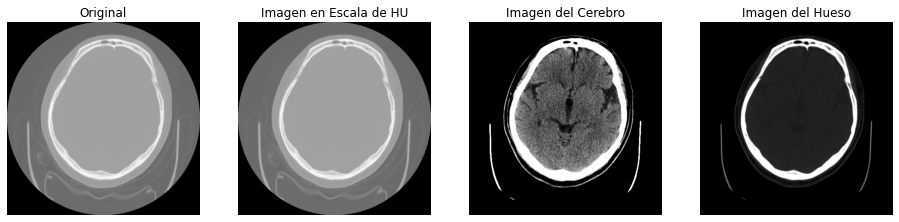

In [ ]:
cargar_graficar_img("ID_0007c5cb8.dcm", save=True)

## Operaciones 

In [ ]:
'Convertir Imagen a JPG'
imagen = pydicom.read_file("ID_000039fa0.dcm")
imagen = imagen.pixel_array.astype(float) #
imagen_Escala = (np.maximum(imagen, 0) / imagen.max())*255.0 #pixeles float
imagen_Escala = np.uint8(imagen_Escala) #pixeles enteros
imagen_final = Image.fromarray(imagen_Escala)
imagen_final.save('imagen1.jpg')

InvalidDicomError: ignored

In [1]:
from PIL import Image

img = Image.open('FirmaT.jpeg')
rgb_img = img.convert('RGB')
rgb_img.save('FirmaThalia.jpg')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Rotar

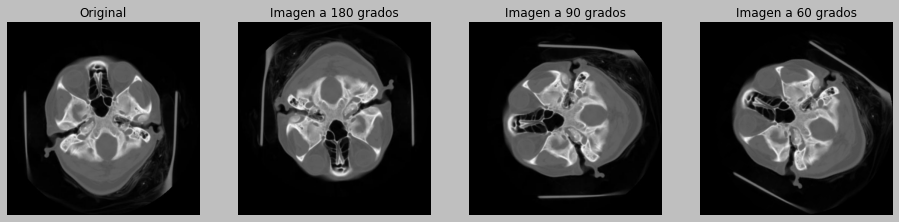

In [ ]:
Imagen_Original = Image.open("/content/imagen1.jpg")
 
# Rotar imagen a 180 grados
Rimagen1 = Imagen_Original.rotate(180)
 
# Esta es una sintaxis alternativa para rotar la imagen
Rimagen2 = Imagen_Original.transpose(Image.ROTATE_90)
 
# Esto rotará la imagen 60 grados
Rimagen3 = Imagen_Original.rotate(60)

fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(Imagen_Original)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(152)
ax2.imshow(Rimagen1)
ax2.title.set_text('Imagen a 180 grados')
ax2.axis('off')

ax3=plt.subplot(153)
ax3.imshow(Rimagen2)
ax3.title.set_text('Imagen a 90 grados')
ax3.axis('off')

ax4=plt.subplot(154)
ax4.imshow(Rimagen3)
ax4.title.set_text('Imagen a 60 grados')
ax4.axis('off')

fig.savefig('Imagenes_Rotadas.png')
plt.show()

### Cortar

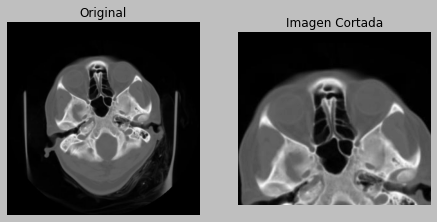

In [ ]:
Cortar=Imagen_Original.crop((100,30,400,300))

fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(Imagen_Original)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(152)
ax2.imshow(Cortar)
ax2.title.set_text('Imagen Cortada')
ax2.axis('off')

fig.savefig('Imagen_Cortada.png')
plt.show()

### Reflejar

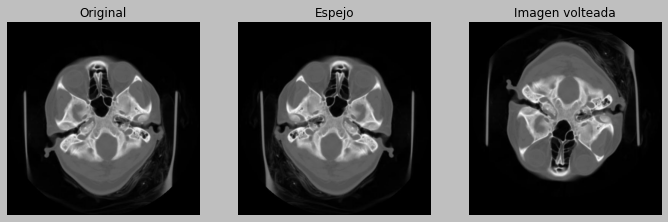

In [ ]:
imagen_volteada= ImageOps.flip(Imagen_Original)
imagen_espejo = ImageOps.mirror(Imagen_Original)

fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(Imagen_Original)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(152)
ax2.imshow(imagen_espejo)
ax2.title.set_text('Espejo')
ax2.axis('off')

ax3=plt.subplot(153)
ax3.imshow(imagen_volteada)
ax3.title.set_text('Imagen volteada')
ax3.axis('off')

fig.savefig('Imagen_Reflejada.png')
plt.show()

### Suma

In [ ]:
img1 = cv2.imread('/content/ID_0007c5cb8-cerebro_imagen.png')
img2 = cv2.imread('/content/ID_0007c5cb8-hueso_imagen.png')

# Aplicación la adición de OpenCV en las imágenes
Simg = cv2.add(img1, img2)

# Guardar la imagen de salida
cv2.imwrite('Suma.jpg', Simg)

True

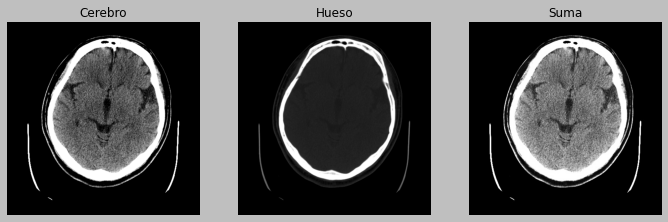

In [ ]:
Imagen_Suma = Image.open("/content/Suma.jpg")

fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(img1)
ax1.title.set_text('Cerebro')
ax1.axis('off')

ax2=plt.subplot(152)
ax2.imshow(img2)
ax2.title.set_text('Hueso')
ax2.axis('off')

ax3=plt.subplot(153)
ax3.imshow(Imagen_Suma)
ax3.title.set_text('Suma')
ax3.axis('off')

fig.savefig('Imagen_Suma.png')
plt.show()

### Resta

In [ ]:
# Aplicación la resta de OpenCV en las imágenes
Rimg = cv2.subtract(img1, img2)

# Guardar la imagen de salida
cv2.imwrite('Resta.jpg', Rimg)

True

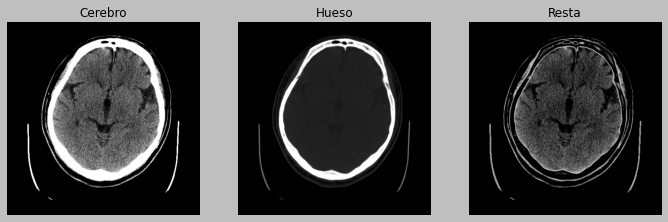

In [ ]:
Imagen_Resta = Image.open("/content/Resta.jpg")

fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(img1)
ax1.title.set_text('Cerebro')
ax1.axis('off')

ax2=plt.subplot(152)
ax2.imshow(img2)
ax2.title.set_text('Hueso')
ax2.axis('off')

ax3=plt.subplot(153)
ax3.imshow(Imagen_Resta)
ax3.title.set_text('Resta')
ax3.axis('off')

fig.savefig('Imagen_Resta.png')
plt.show()

### Tamaño

In [ ]:
Timagen = Imagen_Original.resize((300, 300))

print('El tamaño de la imagen original es de %s' % (Imagen_Original.size,))
print('El tamaño de la Timagen es de %s' % (Timagen.size,))

El tamaño de la imagen original es de (512, 512)
El tamaño de la Timagen es de (300, 300)


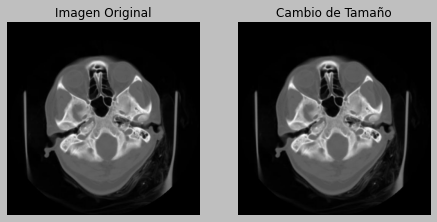

In [ ]:
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(Imagen_Original)
ax1.title.set_text('Imagen Original')
ax1.axis('off')

ax2=plt.subplot(152)
ax2.imshow(Timagen)
ax2.title.set_text('Cambio de Tamaño')
ax2.axis('off')

fig.savefig('Imagen_Tamaño.png')
plt.show()

### Promedio

In [ ]:
img1 = io.imread('/content/ID_0007c5cb8-hueso_imagen.png')
img2 = io.imread('/content/ID_0007c5cb8-cerebro_imagen.png')
prom= np.mean(img1)+np.mean(img2)
print('El promedio de la imágen 1 es de %0.4f' % np.mean(img1))
print('El promedio de la imágen 2 es de %0.4f' % np.mean(img2))
print('El promedio total es de %0.4f' % np.mean(prom))

El promedio de la imágen 1 es de 83.0880
El promedio de la imágen 2 es de 99.7789
El promedio total es de 182.8670


## Transformaciones

### Logarítmica

In [ ]:
o= io.imread("/content/imagen1.jpg")

In [ ]:
## Aplicar la tranformación logarítmica
c=255/(np.log(1+255))
imagen_log=y=c*np.log(o+1)
## Convertir valores Float en Int
imagen_log=np.array(imagen_log, dtype=np.uint8)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


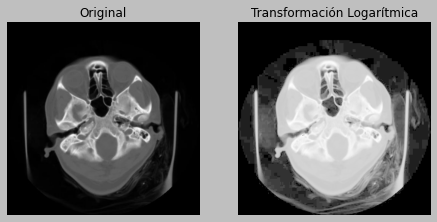

In [ ]:
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(o)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(152)
ax2.imshow(imagen_log)
ax2.title.set_text('Transformación Logarítmica')
ax2.axis('off')

fig.savefig('Imagen_Log.png')
plt.show()

### Logarítmica Inversa

In [ ]:
## Aplicar la tranformación logarítmica inversa
c=255/(np.log(1+255))
imagen_inv_log=y=np.exp(o/c)-1
## Convertir valores Float en Int
imagen_log=np.array(imagen_inv_log, dtype=np.uint8)

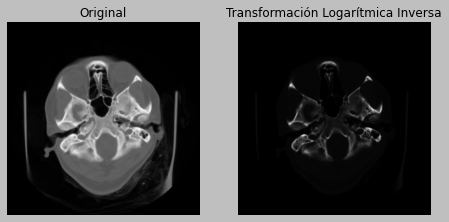

In [ ]:
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(o)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(152)
ax2.imshow(imagen_inv_log)
ax2.title.set_text('Transformación Logarítmica Inversa')
ax2.axis('off')

fig.savefig('Imagen_inv_Log.png')
plt.show()

### Gamma

In [ ]:
## Aplicar la tranformación Gamma
gamma1=0.1
gamma2=0.5
gamma3=1.2
gamma4=2.2
Transformacion_gamma1 = np.array(255*(o/255)**gamma1, dtype = 'uint8')
Transformacion_gamma2 = np.array(255*(o/255)**gamma2, dtype = 'uint8')
Transformacion_gamma3 = np.array(255*(o/255)**gamma3, dtype = 'uint8')
Transformacion_gamma4 = np.array(255*(o/255)**gamma4, dtype = 'uint8')

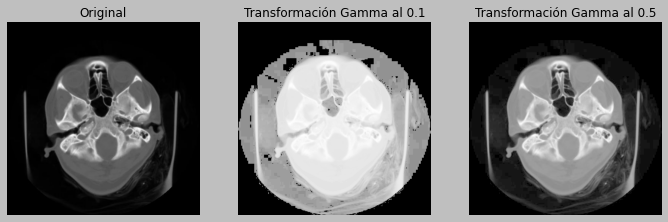

In [ ]:
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(o)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(152)
ax2.imshow(Transformacion_gamma1)
ax2.title.set_text('Transformación Gamma al 0.1')
ax2.axis('off')

ax2=plt.subplot(153)
ax2.imshow(Transformacion_gamma2)
ax2.title.set_text('Transformación Gamma al 0.5')
ax2.axis('off')

fig.savefig('Imagen_Gamma1.png')
plt.show()

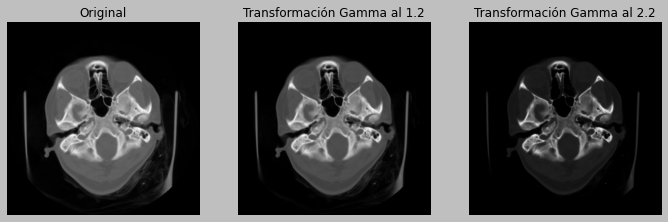

In [ ]:
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(o)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(152)
ax2.imshow(Transformacion_gamma3)
ax2.title.set_text('Transformación Gamma al 1.2')
ax2.axis('off')

ax2=plt.subplot(153)
ax2.imshow(Transformacion_gamma4)
ax2.title.set_text('Transformación Gamma al 2.2')
ax2.axis('off')

fig.savefig('Imagen_Gamma2.png')
plt.show()

### Piecewise

In [ ]:
def pixelVal(pix, r1, s1, r2, s2):
  if (0 <= pix and pix <= r1):
    return (s1 / r1)*pix
  elif (r1 < pix and pix <= r2):
    return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
  else:
    return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
  
# Definir parametros.
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
# Vectorice la función para aplicarla a cada valor en la matriz Numpy.
pixelVal_vec = np.vectorize(pixelVal)
  
# Aplicar estiramiento de contraste.
piecewise = pixelVal_vec(o, r1, s1, r2, s2)

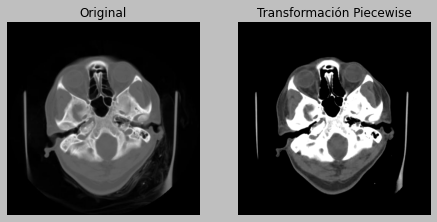

In [ ]:
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(o)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(152)
ax2.imshow(piecewise)
ax2.title.set_text('Transformación Piecewise')
ax2.axis('off')

fig.savefig('Imagen_Piecewise.png')
plt.show()

# Detección de Bordes


## Transformada de Fourier

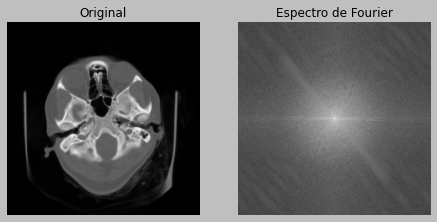

In [ ]:
imgR = cv2.imread("/content/imagen1.jpg")

x = y  = 600
imgR = cv2.resize(imgR,(x,y))

# GRISES
gray = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)

# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(imgR)
ax1.title.set_text('Original')
ax1.axis('off')

img_frr = np.uint8(255*frr_log/np.max(frr_log))

ax2=plt.subplot(152)
ax2.imshow(img_frr)
ax2.title.set_text('Espectro de Fourier')
ax2.axis('off')

fig.savefig('EspectroFourier-Radiografia.png')
plt.show()

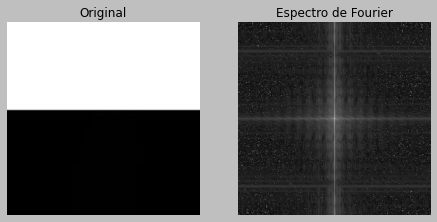

In [ ]:
img = cv2.imread("/content/rectangulo.jpg")

x = y  = 600
img = cv2.resize(img,(x,y))

# GRISES
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)

# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(img)
ax1.title.set_text('Original')
ax1.axis('off')

img_frr = np.uint8(255*frr_log/np.max(frr_log))

ax2=plt.subplot(152)
ax2.imshow(img_frr)
ax2.title.set_text('Espectro de Fourier')
ax2.axis('off')

fig.savefig('EspectroFourier-Rectangulo.png')
plt.show()

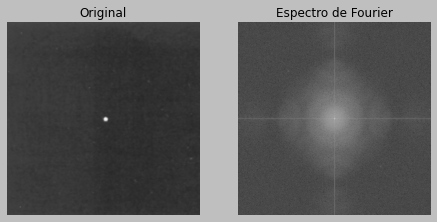

In [ ]:
img = cv2.imread("/content/circulo.png")

x = y  = 600
img = cv2.resize(img,(x,y))

# GRISES
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)

# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(151)
ax1.imshow(img)
ax1.title.set_text('Original')
ax1.axis('off')

img_frr = np.uint8(255*frr_log/np.max(frr_log))

ax2=plt.subplot(152)
ax2.imshow(img_frr)
ax2.title.set_text('Espectro de Fourier')
ax2.axis('off')

fig.savefig('EspectroFourier-Circulo.png')
plt.show()

## Filtro Paso Alto


### Filtro Paso Alto D0=0.10

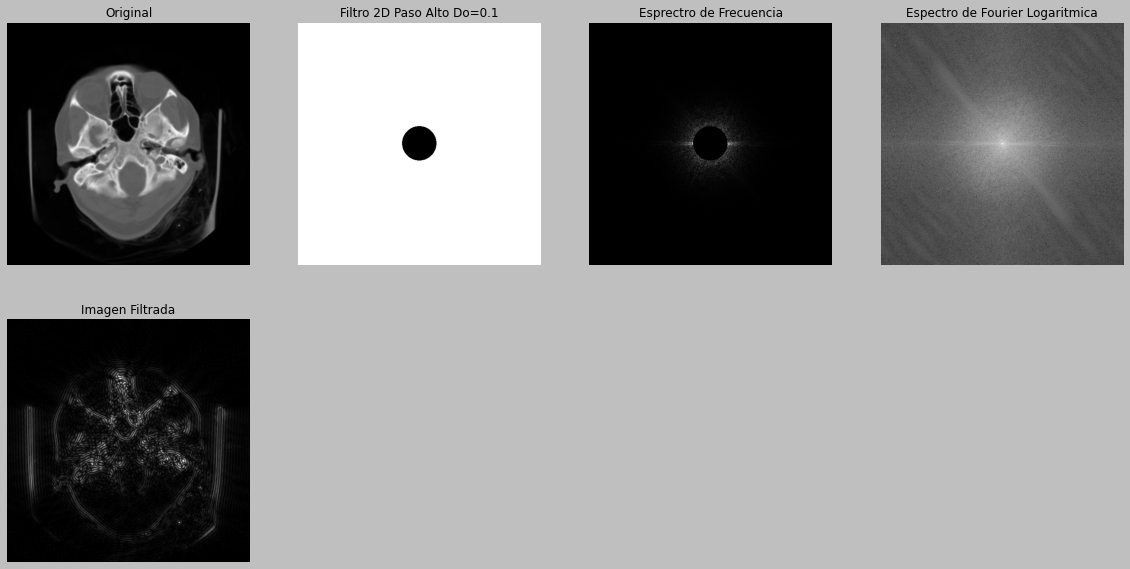

In [ ]:
# FILTRO PASA ALTO
imgR = cv2.imread("/content/imagen1.jpg")

x = y  = 600
imgR = cv2.resize(imgR,(x,y))

# GRISES
gray = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)
img_frr = np.uint8(255*frr_log/np.max(frr_log))

# Parte central valores cercanos al cero.
# y el resto de valores sean altos
F1=np.arange(-x/2+1,x/2+1,1)
F2=np.arange(-y/2+1,y/2+1,1)
[X,Y]=np.meshgrid(F1,F2)    # arreglo matricial de las combinaciones
D=np.sqrt(X**2+Y**2)    # distancia del centro 
D=D/np.max(D)
#DEFINIR RADIO DE CORTE
Do=0.10
#Creación del Filtro Ideal en 2D
Huv=np.zeros((x,y)) # matriz de ceros
#PRIMERO CREAR EL FILTRO PASA BAJO IDEAL
for i in range(x):
    for j in range(y):
        if(D[i,j]<Do):
            Huv[i,j]=1
#CONVERTIR A PASA ALTO IDEAL
Huv=1-Huv

#-MULTIPLICACIÓN ELEMENTO A ELEMENTO EN EL DOMINIO DE LA FRECUENCIA
Guv=Huv*frr
#MAGNITUD
Guv_abs=np.abs(Guv)
Guv_abs=np.uint8(255*Guv_abs/np.max(Guv_abs))
#---TRANSFORMADA INVERSA PARA OBTENER LA SEÑAL FILTRADA 
#IFFT2
gxy=np.fft.ifft2(Guv)
gxy=np.abs(gxy)
gxy=np.uint8(gxy)

# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(241)
ax1.imshow(imgR)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(242)
ax2.imshow(np.uint8(255*Huv))
ax2.title.set_text('Filtro 2D Paso Alto Do=0.1') #FILTRADO EN FRECUENCIA
ax2.axis('off')

ax3=plt.subplot(243)
ax3.imshow(Guv_abs)
ax3.title.set_text('Esprectro de Frecuencia')
ax3.axis('off')

ax4=plt.subplot(244)
ax4.imshow(img_frr)
ax4.title.set_text('Espectro de Fourier Logaritmica')
ax4.axis('off')

ax5=plt.subplot(245)
ax5.imshow(gxy)
ax5.title.set_text('Imagen Filtrada')
ax5.axis('off')

fig.savefig('FiltroAltoD0=0.1_Imagen.png')
plt.show()

### Filtro Paso Alto D0=0.3

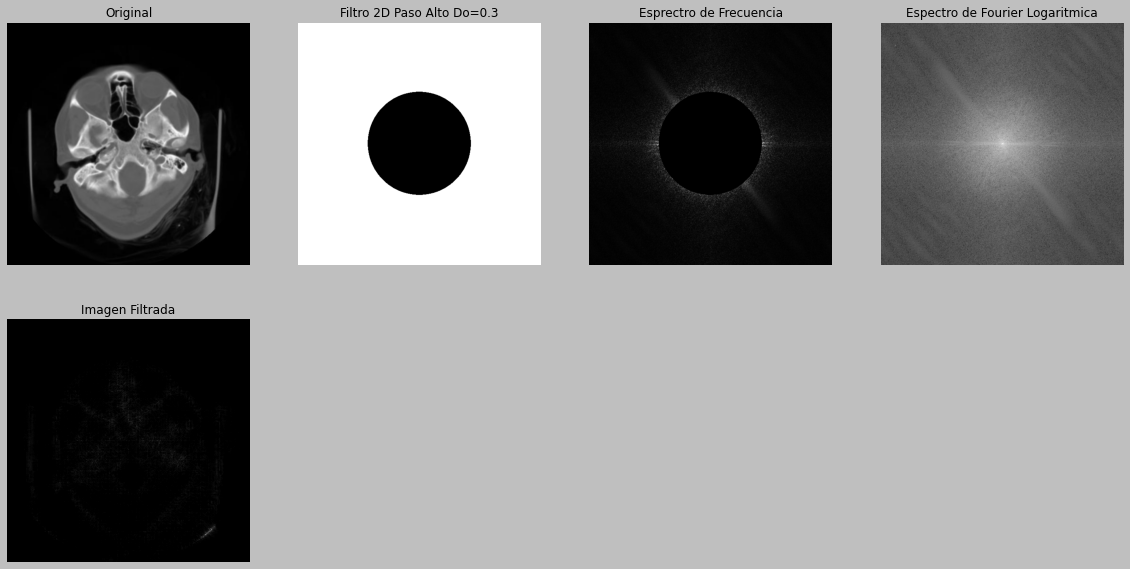

In [ ]:
# FILTRO PASA ALTO
imgR = cv2.imread("/content/imagen1.jpg")

x = y  = 600
imgR = cv2.resize(imgR,(x,y))

# GRISES
gray = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)
img_frr = np.uint8(255*frr_log/np.max(frr_log))

# Parte central valores cercanos al cero.
# y el resto de valores sean altos
F1=np.arange(-x/2+1,x/2+1,1)
F2=np.arange(-y/2+1,y/2+1,1)
[X,Y]=np.meshgrid(F1,F2)    # arreglo matricial de las combinaciones
D=np.sqrt(X**2+Y**2)    # distancia del centro 
D=D/np.max(D)
#DEFINIR RADIO DE CORTE
Do=0.3
#Creación del Filtro Ideal en 2D
Huv=np.zeros((x,y)) # matriz de ceros
#PRIMERO CREAR EL FILTRO PASA BAJO IDEAL
for i in range(x):
    for j in range(y):
        if(D[i,j]<Do):
            Huv[i,j]=1
#CONVERTIR A PASA ALTO IDEAL
Huv=1-Huv

#-MULTIPLICACIÓN ELEMENTO A ELEMENTO EN EL DOMINIO DE LA FRECUENCIA
Guv=Huv*frr
#MAGNITUD
Guv_abs=np.abs(Guv)
Guv_abs=np.uint8(255*Guv_abs/np.max(Guv_abs))
#---TRANSFORMADA INVERSA PARA OBTENER LA SEÑAL FILTRADA 
#IFFT2
gxy=np.fft.ifft2(Guv)
gxy=np.abs(gxy)
gxy=np.uint8(gxy)
# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(241)
ax1.imshow(imgR)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(242)
ax2.imshow(np.uint8(255*Huv))
ax2.title.set_text('Filtro 2D Paso Alto Do=0.3') #FILTRADO EN FRECUENCIA
ax2.axis('off')

ax3=plt.subplot(243)
ax3.imshow(Guv_abs)
ax3.title.set_text('Esprectro de Frecuencia')
ax3.axis('off')

ax4=plt.subplot(244)
ax4.imshow(img_frr)
ax4.title.set_text('Espectro de Fourier Logaritmica')
ax4.axis('off')

ax5=plt.subplot(245)
ax5.imshow(gxy)
ax5.title.set_text('Imagen Filtrada')
ax5.axis('off')

fig.savefig('FiltroAltoD0=0.3_Imagen.png')
plt.show()

### Filtro Paso Alto D0=0.05

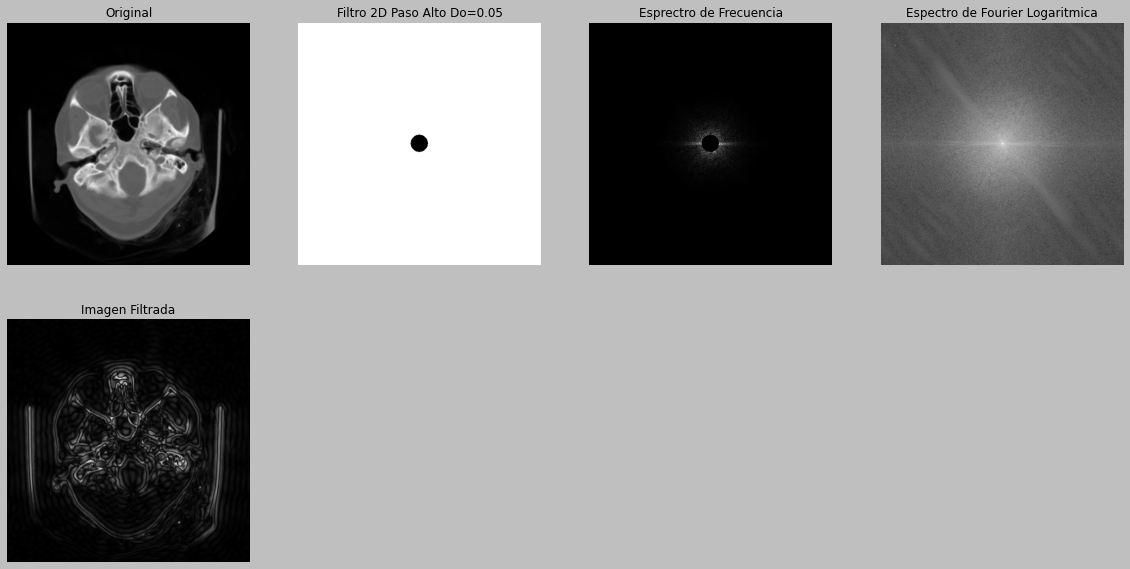

In [ ]:
# FILTRO PASA ALTO
imgR = cv2.imread("/content/imagen1.jpg")

x = y  = 600
imgR = cv2.resize(imgR,(x,y))

# GRISES
gray = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)
img_frr = np.uint8(255*frr_log/np.max(frr_log))

# Parte central valores cercanos al cero.
# y el resto de valores sean altos
F1=np.arange(-x/2+1,x/2+1,1)
F2=np.arange(-y/2+1,y/2+1,1)
[X,Y]=np.meshgrid(F1,F2)    # arreglo matricial de las combinaciones
D=np.sqrt(X**2+Y**2)    # distancia del centro 
D=D/np.max(D)
#DEFINIR RADIO DE CORTE
Do=0.05
#Creación del Filtro Ideal en 2D
Huv=np.zeros((x,y)) # matriz de ceros
#PRIMERO CREAR EL FILTRO PASA BAJO IDEAL
for i in range(x):
    for j in range(y):
        if(D[i,j]<Do):
            Huv[i,j]=1
#CONVERTIR A PASA ALTO IDEAL
Huv=1-Huv

#-MULTIPLICACIÓN ELEMENTO A ELEMENTO EN EL DOMINIO DE LA FRECUENCIA
Guv=Huv*frr
#MAGNITUD
Guv_abs=np.abs(Guv)
Guv_abs=np.uint8(255*Guv_abs/np.max(Guv_abs))
#---TRANSFORMADA INVERSA PARA OBTENER LA SEÑAL FILTRADA 
#IFFT2
gxy=np.fft.ifft2(Guv)
gxy=np.abs(gxy)
gxy=np.uint8(gxy)
# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(241)
ax1.imshow(imgR)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(242)
ax2.imshow(np.uint8(255*Huv))
ax2.title.set_text('Filtro 2D Paso Alto Do=0.05') #FILTRADO EN FRECUENCIA
ax2.axis('off')

ax3=plt.subplot(243)
ax3.imshow(Guv_abs)
ax3.title.set_text('Esprectro de Frecuencia')
ax3.axis('off')

ax4=plt.subplot(244)
ax4.imshow(img_frr)
ax4.title.set_text('Espectro de Fourier Logaritmica')
ax4.axis('off')

ax5=plt.subplot(245)
ax5.imshow(gxy)
ax5.title.set_text('Imagen Filtrada')
ax5.axis('off')

fig.savefig('FiltroAltoD0=0.05_Imagen.png')
plt.show()

### Filtro Paso Alto D0=0.01

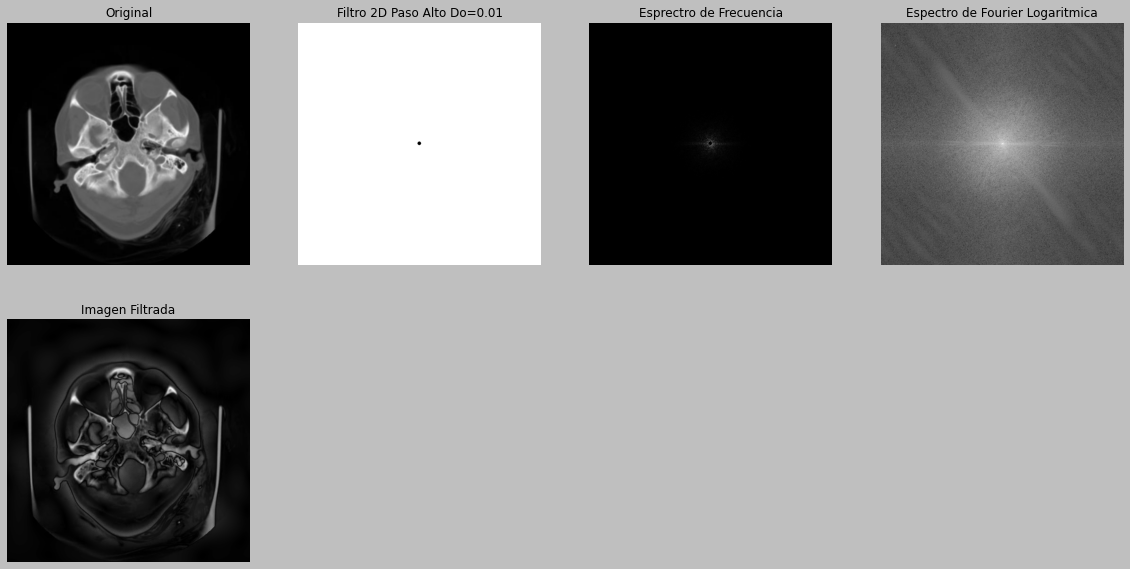

In [ ]:
# FILTRO PASA ALTO
imgR = cv2.imread("/content/imagen1.jpg")

x = y  = 600
imgR = cv2.resize(imgR,(x,y))

# GRISES
gray = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)
img_frr = np.uint8(255*frr_log/np.max(frr_log))

# Parte central valores cercanos al cero.
# y el resto de valores sean altos
F1=np.arange(-x/2+1,x/2+1,1)
F2=np.arange(-y/2+1,y/2+1,1)
[X,Y]=np.meshgrid(F1,F2)    # arreglo matricial de las combinaciones
D=np.sqrt(X**2+Y**2)    # distancia del centro 
D=D/np.max(D)
#DEFINIR RADIO DE CORTE
Do=0.01
#Creación del Filtro Ideal en 2D
Huv=np.zeros((x,y)) # matriz de ceros
#PRIMERO CREAR EL FILTRO PASA BAJO IDEAL
for i in range(x):
    for j in range(y):
        if(D[i,j]<Do):
            Huv[i,j]=1
#CONVERTIR A PASA ALTO IDEAL
Huv=1-Huv

#-MULTIPLICACIÓN ELEMENTO A ELEMENTO EN EL DOMINIO DE LA FRECUENCIA
Guv=Huv*frr
#MAGNITUD
Guv_abs=np.abs(Guv)
Guv_abs=np.uint8(255*Guv_abs/np.max(Guv_abs))
#---TRANSFORMADA INVERSA PARA OBTENER LA SEÑAL FILTRADA 
#IFFT2
gxy=np.fft.ifft2(Guv)
gxy=np.abs(gxy)
gxy=np.uint8(gxy)
# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(241)
ax1.imshow(imgR)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(242)
ax2.imshow(np.uint8(255*Huv))
ax2.title.set_text('Filtro 2D Paso Alto Do=0.01') #FILTRADO EN FRECUENCIA
ax2.axis('off')

ax3=plt.subplot(243)
ax3.imshow(Guv_abs)
ax3.title.set_text('Esprectro de Frecuencia')
ax3.axis('off')

ax4=plt.subplot(244)
ax4.imshow(img_frr)
ax4.title.set_text('Espectro de Fourier Logaritmica')
ax4.axis('off')

ax5=plt.subplot(245)
ax5.imshow(gxy)
ax5.title.set_text('Imagen Filtrada')
ax5.axis('off')

fig.savefig('FiltroAltoD0=0.01_Imagen.png')
plt.show()

### Filtro Paso Alto D0=0.001

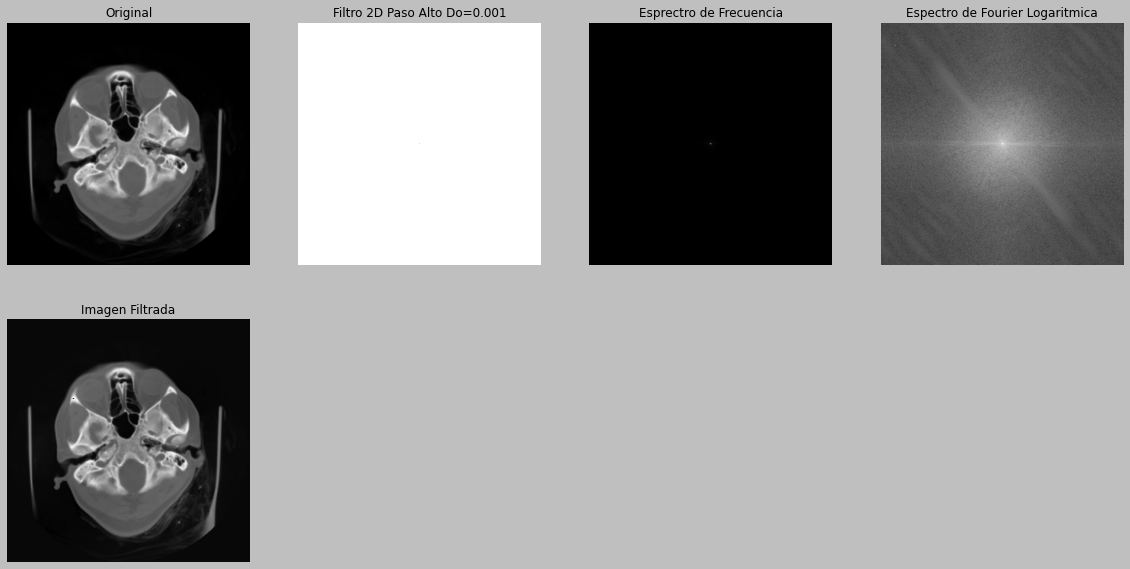

In [ ]:
# FILTRO PASA ALTO
imgR = cv2.imread("/content/imagen1.jpg")

x = y  = 600
imgR = cv2.resize(imgR,(x,y))

# GRISES
gray = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)
img_frr = np.uint8(255*frr_log/np.max(frr_log))

# Parte central valores cercanos al cero.
# y el resto de valores sean altos
F1=np.arange(-x/2+1,x/2+1,1)
F2=np.arange(-y/2+1,y/2+1,1)
[X,Y]=np.meshgrid(F1,F2)    # arreglo matricial de las combinaciones
D=np.sqrt(X**2+Y**2)    # distancia del centro 
D=D/np.max(D)
#DEFINIR RADIO DE CORTE
Do=0.001
#Creación del Filtro Ideal en 2D
Huv=np.zeros((x,y)) # matriz de ceros
#PRIMERO CREAR EL FILTRO PASA BAJO IDEAL
for i in range(x):
    for j in range(y):
        if(D[i,j]<Do):
            Huv[i,j]=1
#CONVERTIR A PASA ALTO IDEAL
Huv=1-Huv

#-MULTIPLICACIÓN ELEMENTO A ELEMENTO EN EL DOMINIO DE LA FRECUENCIA
Guv=Huv*frr
#MAGNITUD
Guv_abs=np.abs(Guv)
Guv_abs=np.uint8(255*Guv_abs/np.max(Guv_abs))
#---TRANSFORMADA INVERSA PARA OBTENER LA SEÑAL FILTRADA 
#IFFT2
gxy=np.fft.ifft2(Guv)
gxy=np.abs(gxy)
gxy=np.uint8(gxy)
# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(241)
ax1.imshow(imgR)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(242)
ax2.imshow(np.uint8(255*Huv))
ax2.title.set_text('Filtro 2D Paso Alto Do=0.001') #FILTRADO EN FRECUENCIA
ax2.axis('off')

ax3=plt.subplot(243)
ax3.imshow(Guv_abs)
ax3.title.set_text('Esprectro de Frecuencia')
ax3.axis('off')

ax4=plt.subplot(244)
ax4.imshow(img_frr)
ax4.title.set_text('Espectro de Fourier Logaritmica')
ax4.axis('off')

ax5=plt.subplot(245)
ax5.imshow(gxy)
ax5.title.set_text('Imagen Filtrada')
ax5.axis('off')

fig.savefig('FiltroAltoD0=0.001_Imagen.png')
plt.show()

## Filtro Paso Bajo

### Filtro Paso Bajo D0=0.10

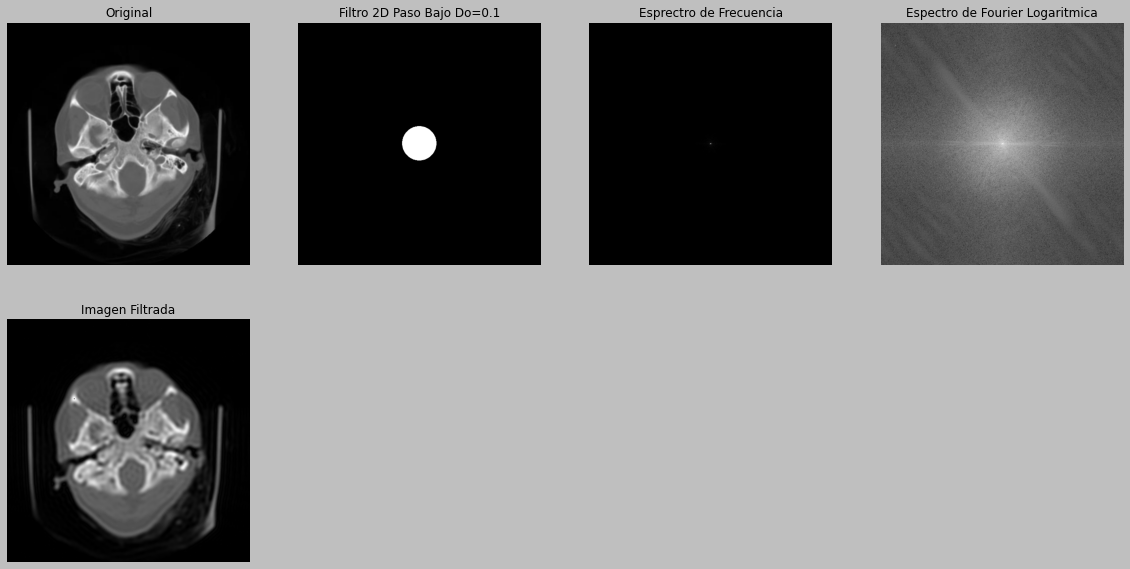

In [ ]:
# FILTRO PASA BAJO
imgR = cv2.imread("/content/imagen1.jpg")

x = y  = 600
imgR = cv2.resize(imgR,(x,y))

# GRISES
gray = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)
img_frr = np.uint8(255*frr_log/np.max(frr_log))

# Parte central valores cercanos al cero.
# y el resto de valores sean altos
F1=np.arange(-x/2+1,x/2+1,1)
F2=np.arange(-y/2+1,y/2+1,1)
[X,Y]=np.meshgrid(F1,F2)    # arreglo matricial de las combinaciones
D=np.sqrt(X**2+Y**2)    # distancia del centro 
D=D/np.max(D)
#DEFINIR RADIO DE CORTE
Do=0.10
#Creación del Filtro Ideal en 2D
Huv=np.zeros((x,y)) # matriz de ceros
#PRIMERO CREAR EL FILTRO PASA BAJO IDEAL
for i in range(x):
    for j in range(y):
        if(D[i,j]<Do):
            Huv[i,j]=1
#-MULTIPLICACIÓN ELEMENTO A ELEMENTO EN EL DOMINIO DE LA FRECUENCIA
Guv=Huv*frr
#MAGNITUD
Guv_abs=np.abs(Guv)
Guv_abs=np.uint8(255*Guv_abs/np.max(Guv_abs))
#---TRANSFORMADA INVERSA PARA OBTENER LA SEÑAL FILTRADA 
#IFFT2
gxy=np.fft.ifft2(Guv)
gxy=np.abs(gxy)
gxy=np.uint8(gxy)

# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(241)
ax1.imshow(imgR)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(242)
ax2.imshow(np.uint8(255*Huv))
ax2.title.set_text('Filtro 2D Paso Bajo Do=0.1') #FILTRADO EN FRECUENCIA
ax2.axis('off')

ax3=plt.subplot(243)
ax3.imshow(Guv_abs)
ax3.title.set_text('Esprectro de Frecuencia')
ax3.axis('off')

ax4=plt.subplot(244)
ax4.imshow(img_frr)
ax4.title.set_text('Espectro de Fourier Logaritmica')
ax4.axis('off')

ax5=plt.subplot(245)
ax5.imshow(gxy)
ax5.title.set_text('Imagen Filtrada')
ax5.axis('off')

fig.savefig('FiltroBajoD0=0.1_Imagen.png')
plt.show()

### Filtro Paso Bajo D0=0.3

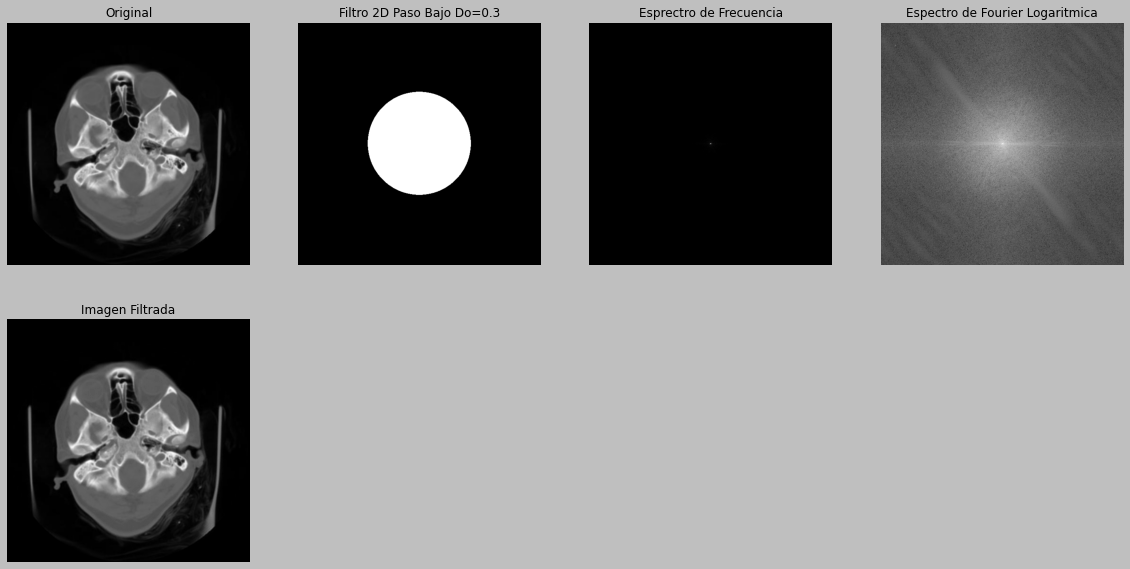

In [ ]:
# FILTRO PASA BAJO
imgR = cv2.imread("/content/imagen1.jpg")

x = y  = 600
imgR = cv2.resize(imgR,(x,y))

# GRISES
gray = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)
img_frr = np.uint8(255*frr_log/np.max(frr_log))

# Parte central valores cercanos al cero.
# y el resto de valores sean altos
F1=np.arange(-x/2+1,x/2+1,1)
F2=np.arange(-y/2+1,y/2+1,1)
[X,Y]=np.meshgrid(F1,F2)    # arreglo matricial de las combinaciones
D=np.sqrt(X**2+Y**2)    # distancia del centro 
D=D/np.max(D)
#DEFINIR RADIO DE CORTE
Do=0.3
#Creación del Filtro Ideal en 2D
Huv=np.zeros((x,y)) # matriz de ceros
#PRIMERO CREAR EL FILTRO PASA BAJO IDEAL
for i in range(x):
    for j in range(y):
        if(D[i,j]<Do):
            Huv[i,j]=1
#-MULTIPLICACIÓN ELEMENTO A ELEMENTO EN EL DOMINIO DE LA FRECUENCIA
Guv=Huv*frr
#MAGNITUD
Guv_abs=np.abs(Guv)
Guv_abs=np.uint8(255*Guv_abs/np.max(Guv_abs))
#---TRANSFORMADA INVERSA PARA OBTENER LA SEÑAL FILTRADA 
#IFFT2
gxy=np.fft.ifft2(Guv)
gxy=np.abs(gxy)
gxy=np.uint8(gxy)

# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(241)
ax1.imshow(imgR)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(242)
ax2.imshow(np.uint8(255*Huv))
ax2.title.set_text('Filtro 2D Paso Bajo Do=0.3') #FILTRADO EN FRECUENCIA
ax2.axis('off')

ax3=plt.subplot(243)
ax3.imshow(Guv_abs)
ax3.title.set_text('Esprectro de Frecuencia')
ax3.axis('off')

ax4=plt.subplot(244)
ax4.imshow(img_frr)
ax4.title.set_text('Espectro de Fourier Logaritmica')
ax4.axis('off')

ax5=plt.subplot(245)
ax5.imshow(gxy)
ax5.title.set_text('Imagen Filtrada')
ax5.axis('off')

fig.savefig('FiltroBajoD0=0.3_Imagen.png')
plt.show()

### Filtro Paso Bajo D0=0.05

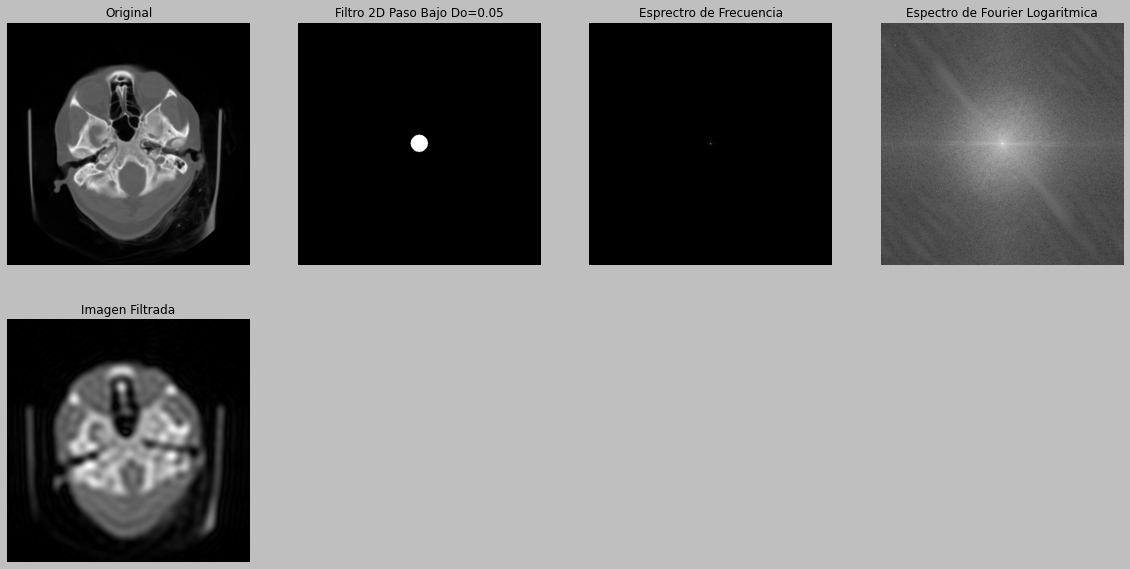

In [ ]:
# FILTRO PASA BAJO
imgR = cv2.imread("/content/imagen1.jpg")

x = y  = 600
imgR = cv2.resize(imgR,(x,y))

# GRISES
gray = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)
img_frr = np.uint8(255*frr_log/np.max(frr_log))

# Parte central valores cercanos al cero.
# y el resto de valores sean altos
F1=np.arange(-x/2+1,x/2+1,1)
F2=np.arange(-y/2+1,y/2+1,1)
[X,Y]=np.meshgrid(F1,F2)    # arreglo matricial de las combinaciones
D=np.sqrt(X**2+Y**2)    # distancia del centro 
D=D/np.max(D)
#DEFINIR RADIO DE CORTE
Do=0.05
#Creación del Filtro Ideal en 2D
Huv=np.zeros((x,y)) # matriz de ceros
#PRIMERO CREAR EL FILTRO PASA BAJO IDEAL
for i in range(x):
    for j in range(y):
        if(D[i,j]<Do):
            Huv[i,j]=1
#-MULTIPLICACIÓN ELEMENTO A ELEMENTO EN EL DOMINIO DE LA FRECUENCIA
Guv=Huv*frr
#MAGNITUD
Guv_abs=np.abs(Guv)
Guv_abs=np.uint8(255*Guv_abs/np.max(Guv_abs))
#---TRANSFORMADA INVERSA PARA OBTENER LA SEÑAL FILTRADA 
#IFFT2
gxy=np.fft.ifft2(Guv)
gxy=np.abs(gxy)
gxy=np.uint8(gxy)

# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(241)
ax1.imshow(imgR)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(242)
ax2.imshow(np.uint8(255*Huv))
ax2.title.set_text('Filtro 2D Paso Bajo Do=0.05') #FILTRADO EN FRECUENCIA
ax2.axis('off')

ax3=plt.subplot(243)
ax3.imshow(Guv_abs)
ax3.title.set_text('Esprectro de Frecuencia')
ax3.axis('off')

ax4=plt.subplot(244)
ax4.imshow(img_frr)
ax4.title.set_text('Espectro de Fourier Logaritmica')
ax4.axis('off')

ax5=plt.subplot(245)
ax5.imshow(gxy)
ax5.title.set_text('Imagen Filtrada')
ax5.axis('off')

fig.savefig('FiltroBajoD0=0.05_Imagen.png')
plt.show()

### Filtro Paso Bajo D0=0.01

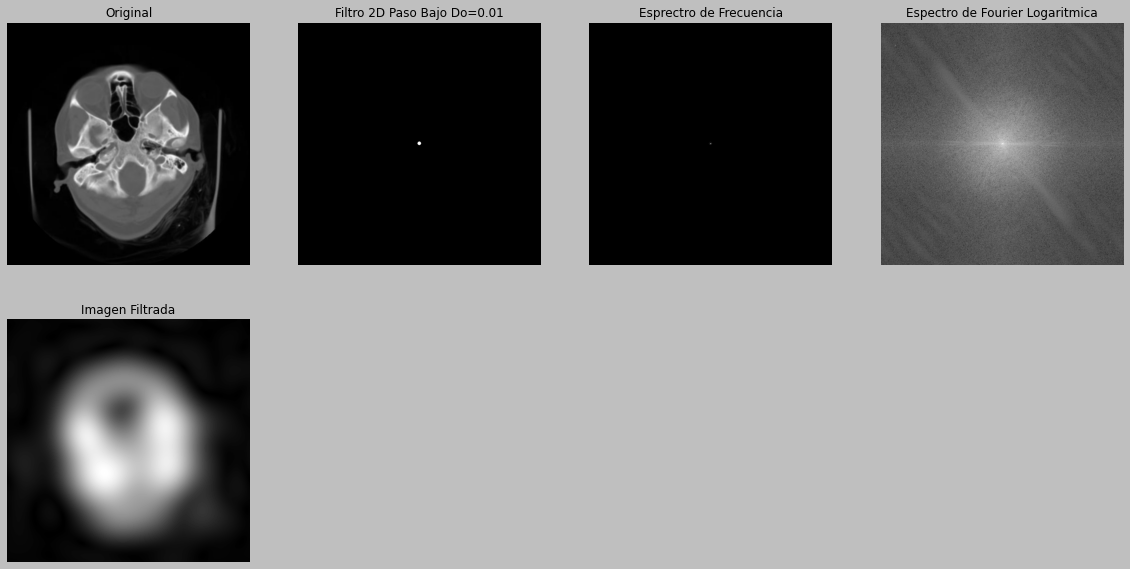

In [ ]:
# FILTRO PASO BAJO
imgR = cv2.imread("/content/imagen1.jpg")

x = y  = 600
imgR = cv2.resize(imgR,(x,y))

# GRISES
gray = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)
img_frr = np.uint8(255*frr_log/np.max(frr_log))

# Parte central valores cercanos al cero.
# y el resto de valores sean altos
F1=np.arange(-x/2+1,x/2+1,1)
F2=np.arange(-y/2+1,y/2+1,1)
[X,Y]=np.meshgrid(F1,F2)    # arreglo matricial de las combinaciones
D=np.sqrt(X**2+Y**2)    # distancia del centro 
D=D/np.max(D)
#DEFINIR RADIO DE CORTE
Do=0.01
#Creación del Filtro Ideal en 2D
Huv=np.zeros((x,y)) # matriz de ceros
#PRIMERO CREAR EL FILTRO PASA BAJO IDEAL
for i in range(x):
    for j in range(y):
        if(D[i,j]<Do):
            Huv[i,j]=1

#-MULTIPLICACIÓN ELEMENTO A ELEMENTO EN EL DOMINIO DE LA FRECUENCIA
Guv=Huv*frr
#MAGNITUD
Guv_abs=np.abs(Guv)
Guv_abs=np.uint8(255*Guv_abs/np.max(Guv_abs))
#---TRANSFORMADA INVERSA PARA OBTENER LA SEÑAL FILTRADA 
#IFFT2
gxy=np.fft.ifft2(Guv)
gxy=np.abs(gxy)
gxy=np.uint8(gxy)
# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(241)
ax1.imshow(imgR)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(242)
ax2.imshow(np.uint8(255*Huv))
ax2.title.set_text('Filtro 2D Paso Bajo Do=0.01') #FILTRADO EN FRECUENCIA
ax2.axis('off')

ax3=plt.subplot(243)
ax3.imshow(Guv_abs)
ax3.title.set_text('Esprectro de Frecuencia')
ax3.axis('off')

ax4=plt.subplot(244)
ax4.imshow(img_frr)
ax4.title.set_text('Espectro de Fourier Logaritmica')
ax4.axis('off')

ax5=plt.subplot(245)
ax5.imshow(gxy)
ax5.title.set_text('Imagen Filtrada')
ax5.axis('off')

fig.savefig('FiltroBajoD0=0.01_Imagen.png')
plt.show()

### Filtro Paso Bajo D0=0.001

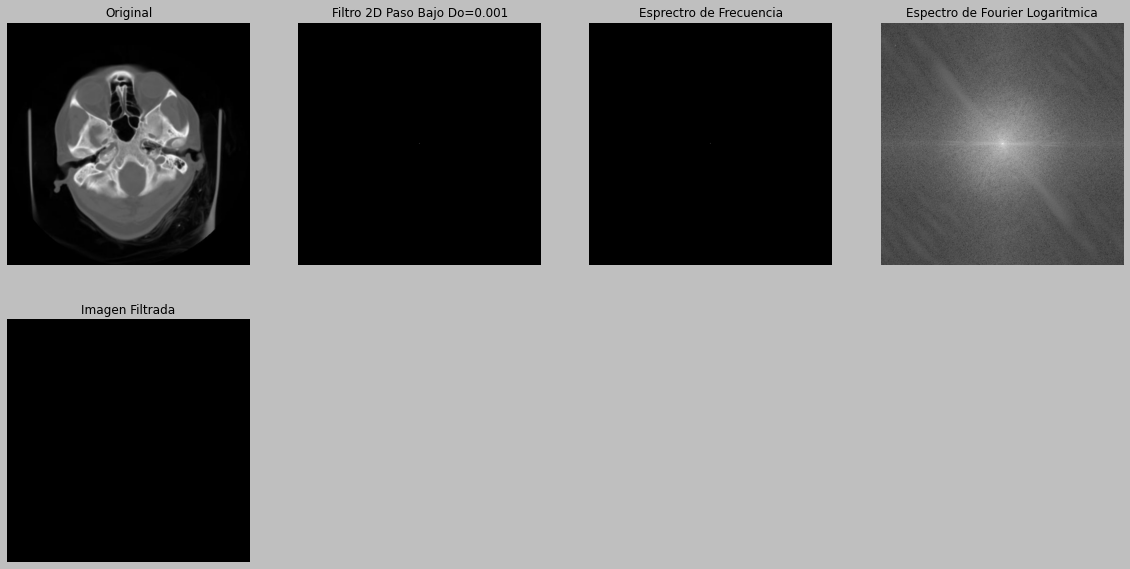

In [ ]:
# FILTRO PASA BAJO
imgR = cv2.imread("/content/imagen1.jpg")

x = y  = 600
imgR = cv2.resize(imgR,(x,y))

# GRISES
gray = cv2.cvtColor(imgR,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

# TRANSFORMADA DE FOURIER EN 2D
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)

# CALCULAR LA MAGNITUD DEL ARREGLO
frr_abs = np.abs(frr)

# ESPECTRO DE FRECUENCIA EN ESCALA LOGARITMICA
frr_log = 20*np.log10(frr_abs)
img_frr = np.uint8(255*frr_log/np.max(frr_log))

# Parte central valores cercanos al cero.
# y el resto de valores sean altos
F1=np.arange(-x/2+1,x/2+1,1)
F2=np.arange(-y/2+1,y/2+1,1)
[X,Y]=np.meshgrid(F1,F2)    # arreglo matricial de las combinaciones
D=np.sqrt(X**2+Y**2)    # distancia del centro 
D=D/np.max(D)
#DEFINIR RADIO DE CORTE
Do=0.001
#Creación del Filtro Ideal en 2D
Huv=np.zeros((x,y)) # matriz de ceros
#PRIMERO CREAR EL FILTRO PASA BAJO IDEAL
for i in range(x):
    for j in range(y):
        if(D[i,j]<Do):
            Huv[i,j]=1
#-MULTIPLICACIÓN ELEMENTO A ELEMENTO EN EL DOMINIO DE LA FRECUENCIA
Guv=Huv*frr
#MAGNITUD
Guv_abs=np.abs(Guv)
Guv_abs=np.uint8(255*Guv_abs/np.max(Guv_abs))
#---TRANSFORMADA INVERSA PARA OBTENER LA SEÑAL FILTRADA 
#IFFT2
gxy=np.fft.ifft2(Guv)
gxy=np.abs(gxy)
gxy=np.uint8(gxy)

# MOSTRAMOS LA IMAGEN
fig=plt.figure(figsize=(20, 10))

ax1=plt.subplot(241)
ax1.imshow(imgR)
ax1.title.set_text('Original')
ax1.axis('off')

ax2=plt.subplot(242)
ax2.imshow(np.uint8(255*Huv))
ax2.title.set_text('Filtro 2D Paso Bajo Do=0.001') #FILTRADO EN FRECUENCIA
ax2.axis('off')

ax3=plt.subplot(243)
ax3.imshow(Guv_abs)
ax3.title.set_text('Esprectro de Frecuencia')
ax3.axis('off')

ax4=plt.subplot(244)
ax4.imshow(img_frr)
ax4.title.set_text('Espectro de Fourier Logaritmica')
ax4.axis('off')

ax5=plt.subplot(245)
ax5.imshow(gxy)
ax5.title.set_text('Imagen Filtrada')
ax5.axis('off')

fig.savefig('FiltroBajoD0=0.001_Imagen.png')
plt.show()